<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

In [193]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

In [194]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')

In [195]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [196]:
species = list(df.species.unique())
characteristics = list(df.columns[2:-1])

def string(items):
    items = [i.replace("_", " ").replace("mm", "(mm)").replace(" g", " (g)") for i in items]
    return ', '.join(items)

md = (
    
    f"**Hay {len(species)} especies de pinguinos**: {string(species)}"
    "\n \n"
    f"**Y {len(characteristics)} caracteristicas**: {string(characteristics)}.")
display(Markdown(md))

**Hay 3 especies de pinguinos**: Adelie, Chinstrap, Gentoo
 
**Y 4 caracteristicas**: bill length (mm), bill depth (mm), flipper length (mm), body mass (g).

### 2. ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

In [197]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [198]:
print(f"Hay {df.isna().sum().sum()} valores nulos en el dataset.")


Hay 19 valores nulos en el dataset.


In [199]:
numeric_cols = df.select_dtypes(include=['float64']).columns
str_cols = df.select_dtypes(include=['object']).columns[-1]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[str_cols] = df[str_cols].fillna(df[str_cols].mode()[0])
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [200]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [201]:
percentages = df["island"].value_counts(normalize=True) * 100
percentages

island
Biscoe       48.837209
Dream        36.046512
Torgersen    15.116279
Name: proportion, dtype: float64

In [202]:
print(f"La isla con mas pinguinos es {df['island'].value_counts().idxmax()} con {df['island'].value_counts().max()} pinguinos. \n" +
      f"Si hay un desbalance, pues la isla Biscoe tiene el {percentages['Biscoe']:.2f}% de los pinguinos. " +
      f"mietras que la isla Torgersen tiene solo el {percentages['Torgersen']:.2f}% de los pinguinos.")

La isla con mas pinguinos es Biscoe con 168 pinguinos. 
Si hay un desbalance, pues la isla Biscoe tiene el 48.84% de los pinguinos. mietras que la isla Torgersen tiene solo el 15.12% de los pinguinos.


### 4. Repita la pregunta anterior observando las especies. 

Cual es la isla con mayor numero de especies?

In [203]:
df.groupby("island")["species"].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

In [204]:
number_species = df.groupby("island")["species"].nunique()
number_species

island
Biscoe       2
Dream        2
Torgersen    1
Name: species, dtype: int64

In [205]:
print(f"Las islas con mayor numero de especies son: \n" +
      f"{number_species.index[0]} y {number_species.index[1]} con {number_species.max()} especies. \n" +
      f"Y si hay un debalance, pues la isla {number_species.idxmin()} tiene solo {number_species.min()} especie."
)

Las islas con mayor numero de especies son: 
Biscoe y Dream con 2 especies. 
Y si hay un debalance, pues la isla Torgersen tiene solo 1 especie.


### 5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [206]:
stats = (
    df.groupby("species")["bill_length_mm"]
      .agg(mean="mean", std="std")
      .rename(columns={"mean": "mean_bill_length", "std": "std_bill_length"})
)
stats

,mean_bill_length,std_bill_length
species,,
Adelie,38.825144,2.686991
Chinstrap,48.833824,3.339256
Gentoo,47.475983,3.086123


In [207]:
md = (
    f"Las longitud media y la desviacion estandar del pico de los pinguinos por especie son \n"
    f"{stats.to_markdown(floatfmt=".2f")}\n"
)
display(Markdown(md))

Las longitud media y la desviacion estandar del pico de los pinguinos por especie son 
| species   |   mean_bill_length |   std_bill_length |
|:----------|-------------------:|------------------:|
| Adelie    |              38.83 |              2.69 |
| Chinstrap |              48.83 |              3.34 |
| Gentoo    |              47.48 |              3.09 |


### 6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [208]:
largest = df.nlargest(1, "bill_length_mm")[['species', 'bill_length_mm']]
largest

,species,bill_length_mm
253,Gentoo,59.6


In [209]:
print(
    f"El pinguino con el pico mas largo es un {largest['species'].values[0]} con {largest['bill_length_mm'].values[0]} mm de largo."
)


El pinguino con el pico mas largo es un Gentoo con 59.6 mm de largo.


### 7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

In [210]:
df.groupby("species")["body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,3703.958910,458.848798,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,124.0,5068.965761,508.164382,3950.0,4700.0,5000.0,5500.0,6300.0


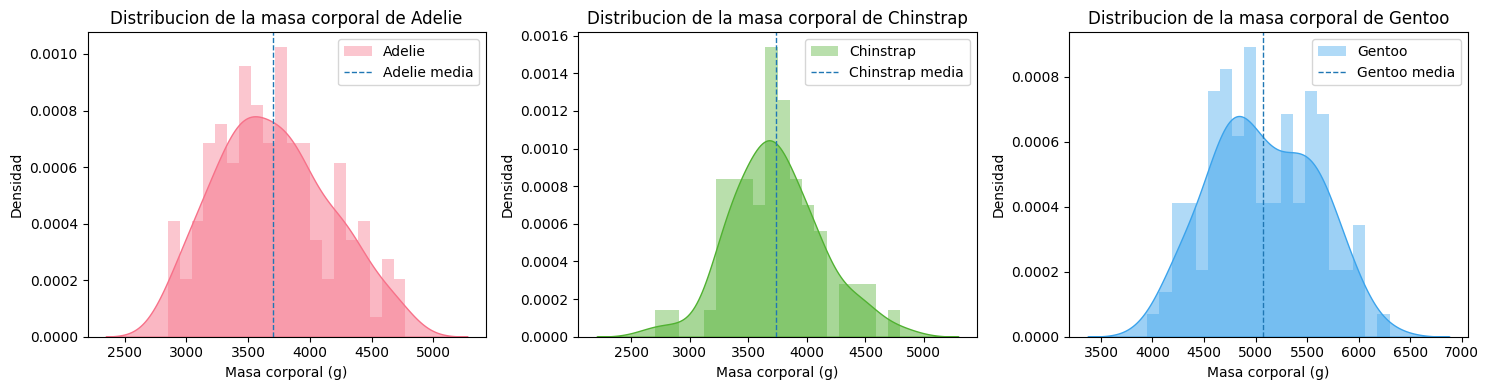

In [211]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
colors = sns.color_palette("husl", len(df["species"].unique()))
cont = 0
for species in df["species"].unique():
    datos = df.loc[df["species"]==species, "body_mass_g"]
    ax[cont].hist(datos, bins=20, alpha=0.4, label=species, density=True, color=colors[cont])
    sns.kdeplot(x=datos, fill=True, ax=ax[cont], color=colors[cont], alpha=0.5)
    ax[cont].axvline(datos.mean(), linestyle='dashed', linewidth=1, label=f'{species} media')
    ax[cont].set_title(f"Distribucion de la masa corporal de {species}")
    ax[cont].set_xlabel("Masa corporal (g)")
    ax[cont].set_ylabel("Densidad")
    ax[cont].legend()

    cont += 1
plt.tight_layout()
plt.show()

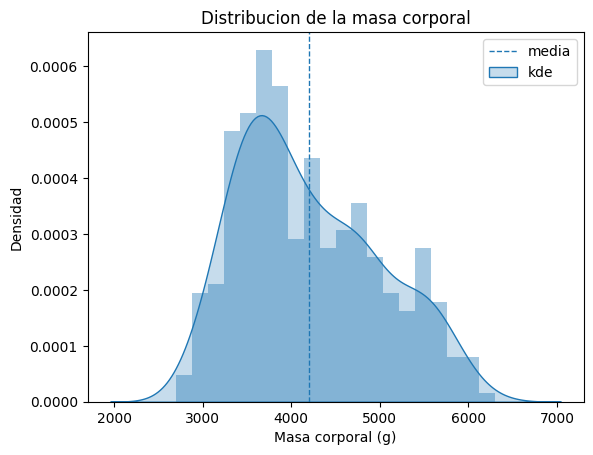

In [212]:
plt.hist(df['body_mass_g'], bins=20, alpha=0.4, density=True)
plt.axvline(df['body_mass_g'].mean(), linestyle='dashed', linewidth=1, label='media')
sns.kdeplot(data=df, x='body_mass_g', fill=True, label='kde')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Densidad')
plt.title('Distribucion de la masa corporal')
plt.legend()
plt.show()

### 8. Describa la distribucion con ayuda de la media, desviacion estandard

In [213]:
df.groupby("species")["body_mass_g"].agg(mean="mean", std="std").rename(columns={"mean": "mean body mass", "std": "std body mass"})

,mean body mass,std body mass
species,,
Adelie,3703.958910,458.848798
Chinstrap,3733.088235,384.335081
Gentoo,5068.965761,508.164382


* Gentoo es la mas pesada de las tres especies y la que presenta mayor dispercion en los datos.
* Adelie y Chinstrap presentan pesos similares aunque la dispersion de los datos de Adelie es mayor que la de Chinstrap

### 9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [214]:
stats = df.groupby("sex")["body_mass_g"].agg(mean="mean", std="std").rename(columns={"mean": "mean_body_mass (g)", "std": "std_body_mass (g)"}).T
stats["diff"] = abs(stats["Female"] - stats["Male"])
stats.columns.name = None

stats


,Female,Male,diff
mean_body_mass (g),3862.272727,4514.684407,652.411679
std_body_mass (g),666.172050,786.052675,119.880625


### 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [215]:
df.groupby("species")["flipper_length_mm"].agg(mean="mean", std="std").rename(columns={"mean": "mean flipper length", "std": "std flipper length"})

,mean flipper length,std flipper length
species,,
Adelie,190.025758,6.578130
Chinstrap,195.823529,7.131894
Gentoo,217.055768,6.621801


### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [216]:
df.groupby("species")["flipper_length_mm"].agg(mean="min", std="max").rename(columns={"mean": "min flipper length", "std": "max flipper length"})

,min flipper length,max flipper length
species,,
Adelie,172.000000,210.0
Chinstrap,178.000000,212.0
Gentoo,200.915205,231.0


### 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [217]:
df.groupby(["island", "species"])["bill_length_mm"].agg(mean="mean", std="std", min="min", max="max").round(2).unstack("species")

mean                     std                     min            \
species   Adelie Chinstrap Gentoo Adelie Chinstrap Gentoo Adelie Chinstrap   
island                                                                       
Biscoe     38.98       NaN  47.48   2.48       NaN   3.09   34.5       NaN   
Dream      38.50     48.83    NaN   2.47      3.34    NaN   32.1      40.9   
Torgersen  39.05       NaN    NaN   3.07       NaN    NaN   33.5       NaN   

                    max                   
species   Gentoo Adelie Chinstrap Gentoo  
island                                    
Biscoe      40.9   45.6       NaN   59.6  
Dream        NaN   44.1      58.0    NaN  
Torgersen    NaN   46.0       NaN    NaN

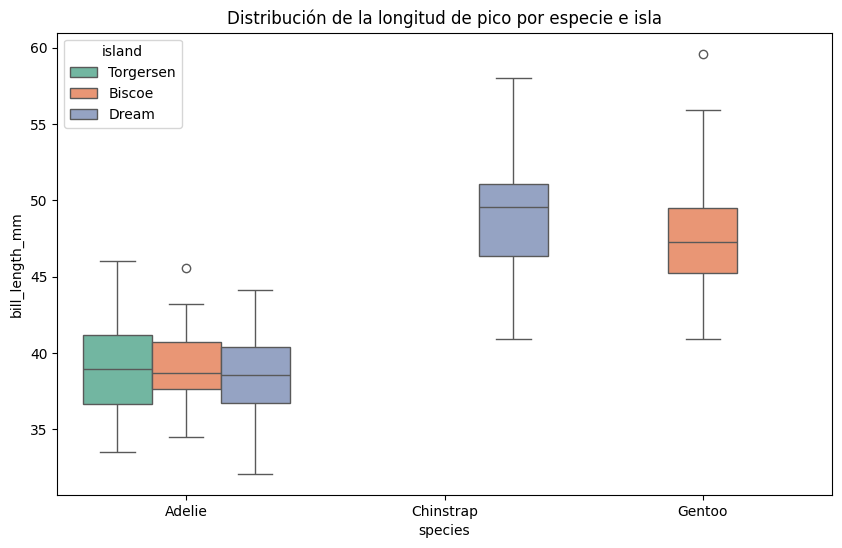

In [218]:
plt.figure(figsize=(10,6))
sns.boxplot(
  data=df,
  x="species",
  y="bill_length_mm",
  hue="island",
  palette="Set2"
)
plt.title("Distribución de la longitud de pico por especie e isla")
plt.show()


Para la especie Adelie, la longitud del pico en las tres islas es parecida, aunque presenta pequeñas variaciones y es la menor entre las tres especies.

La mayor longitud del pico la tiene la especie Chinstrap, localizada en la isla Dream.

La longitud del pico de la especie Gentoo no esta muy alejada de la de la especie Chinstrap pero es menor.

### 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [219]:
df.groupby(["island", "species"])["bill_length_mm"].describe()

count       mean       std   min     25%    50%     75%  \
island    species                                                              
Biscoe    Adelie      44.0  38.975000  2.480916  34.5  37.675  38.70  40.700   
          Gentoo     124.0  47.475983  3.086123  40.9  45.275  47.25  49.525   
Dream     Adelie      56.0  38.501786  2.465359  32.1  36.750  38.55  40.375   
          Chinstrap   68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Torgersen Adelie      52.0  39.046576  3.073806  33.5  36.675  38.95  41.175   

                      max  
island    species          
Biscoe    Adelie     45.6  
          Gentoo     59.6  
Dream     Adelie     44.1  
          Chinstrap  58.0  
Torgersen Adelie     46.0

La isla con la mayor variacion es Dream

### 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

In [220]:
df[["bill_length_mm", "body_mass_g"]].corr(method="pearson")

,bill_length_mm,body_mass_g
bill_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


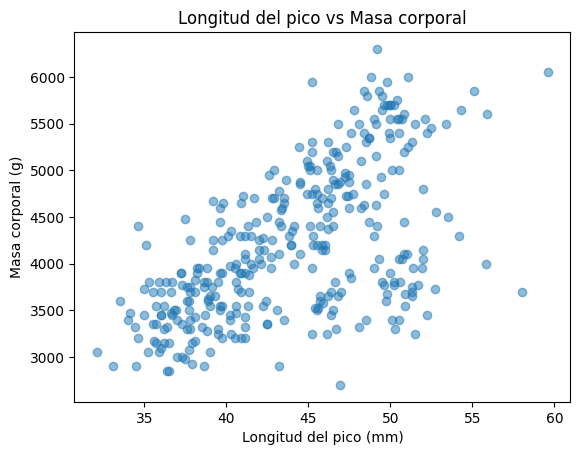

In [221]:
x = df["bill_length_mm"]
y = df["body_mass_g"]
plt.plot(x, y, 'o', alpha=0.5)
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.title("Longitud del pico vs Masa corporal")
plt.show()

In [222]:
corr = (
    df
    .groupby('species')[['bill_length_mm','body_mass_g']]  
    .apply(lambda g: g['bill_length_mm'].corr(g['body_mass_g']))
    .round(2)
    .to_frame('pearson_corr')
)


corr

,pearson_corr
species,
Adelie,0.55
Chinstrap,0.51
Gentoo,0.67


In [223]:
df.groupby("species")[["bill_length_mm", "body_mass_g"]].corr(method="pearson").round(2).T

species                Adelie                  Chinstrap              \
               bill_length_mm body_mass_g bill_length_mm body_mass_g   
bill_length_mm           1.00        0.55           1.00        0.51   
body_mass_g              0.55        1.00           0.51        1.00   

species                Gentoo              
               bill_length_mm body_mass_g  
bill_length_mm           1.00        0.67  
body_mass_g              0.67        1.00

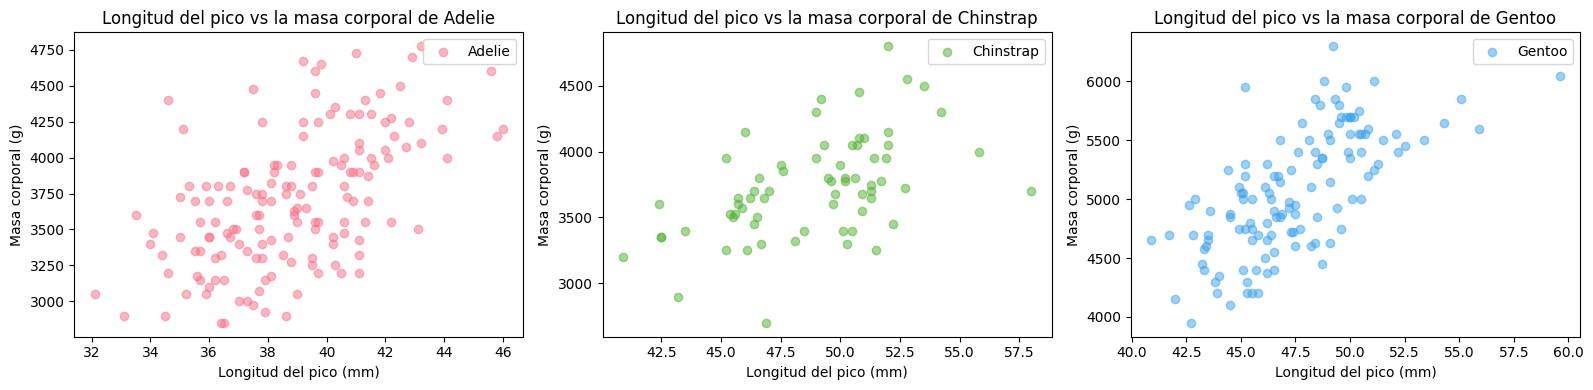

In [224]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

colors = sns.color_palette("husl", len(df["species"].unique()))
for i, species in enumerate(df["species"].unique()):
    data = df[df["species"] == species]
    ax[i].scatter(data["bill_length_mm"], data["body_mass_g"], alpha=0.5, color=colors[i])
    ax[i].set_title(f"Longitud del pico vs la masa corporal de {species}")
    ax[i].set_xlabel("Longitud del pico (mm)")
    ax[i].set_ylabel("Masa corporal (g)")
    ax[i].legend([species])
plt.tight_layout()
plt.show()

Basado en el coeficiente de correlacion de Pearson y en los diagramas de dispersion, se puede afirmar que hay una relacion lineal entre los datos.

### 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

Si, hay una moderada correlacion positiva entre la longitud del pico y la masa corporal de los pinguinos.


### 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

In [225]:
df.groupby(["species", "sex"])["flipper_length_mm"].agg(count="count", mean="mean", std="std").round(1).unstack("sex")

count        mean           std     
sex       Female Male Female   Male Female Male
species                                        
Adelie        73   79  187.8  192.1    5.6  6.8
Chinstrap     34   34  191.7  199.9    5.8  6.0
Gentoo        58   66  212.7  220.9    3.9  6.2

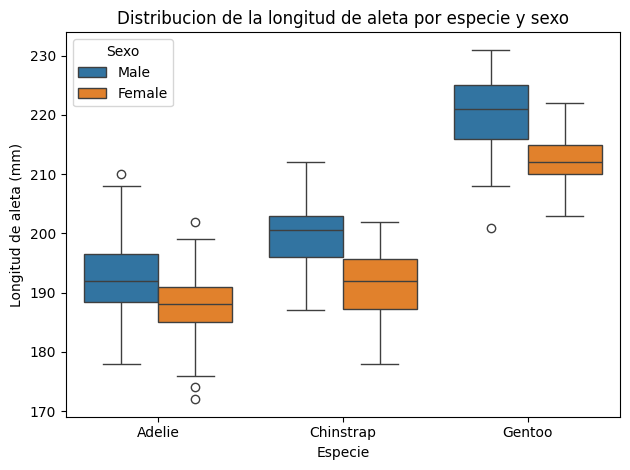

In [226]:
sns.boxplot(data=df, x="species", y="flipper_length_mm", hue="sex")
plt.title("Distribucion de la longitud de aleta por especie y sexo")
plt.xlabel("Especie")
plt.ylabel("Longitud de aleta (mm)")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


Viendo la distribucion de longitud por sexo, nos indica que la longitud de las aletas de los machos es mayor que la de las hembras para cada especie

### 17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Hipotesis nula:
$$H_0 = \text{La medida de la longitud de la aleta es la misma para machos y hembras de cada especie.}$$ 


In [227]:
from scipy import stats

for sp in df['species'].unique():
    group = df[df['species']==sp]
    male = group[group.sex=='Male']['flipper_length_mm']
    female = group[group.sex=='Female']['flipper_length_mm']
    tstat, pval = stats.ttest_ind(male, female, equal_var=False)
    print(f"{sp}: t={tstat:.2f}, p={pval:.15f}")

Adelie: t=4.27, p=0.000034507834441
Chinstrap: t=5.75, p=0.000000253514808
Gentoo: t=8.93, p=0.000000000000010


Como vemos en los resultados, los valores $t>0$ nos indican que la longitud de las aletas de los machos es mayor que las de las hembras.

Los valores $p << 0.05$ nos indican que este resultado no se debe a la aleatoriedad.


Por lo tanto podemos afirmar con confianza que las aletas de los machos son mas largas que las de las hembras para cada especie y por consiguiente las aletas de los machos en general de la muestra son mas grandes.

La especie Gentoo presenta la mayor diferencia en la longitud, mientras que la menor diferencia la presenta la especie Adelie
